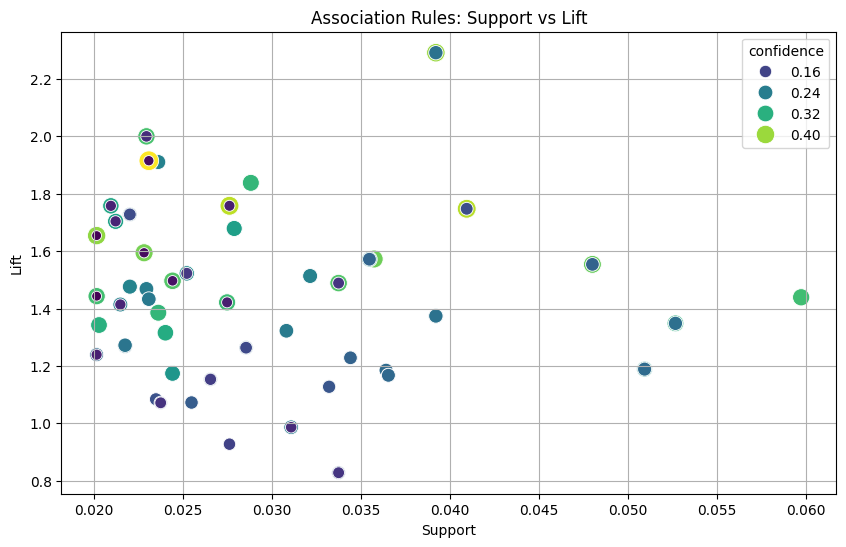

Top 10 Association Rules:
        antecedents     consequents   support  confidence      lift
0            (eggs)       (burgers)  0.028796    0.160237  1.837830
1         (burgers)          (eggs)  0.028796    0.330275  1.837830
2    (french fries)       (burgers)  0.021997    0.128705  1.476173
3         (burgers)  (french fries)  0.021997    0.252294  1.476173
4   (mineral water)       (burgers)  0.024397    0.102349  1.173883
..              ...             ...       ...         ...       ...
95      (spaghetti)      (pancakes)  0.025197    0.144717  1.522468
96         (shrimp)     (spaghetti)  0.021197    0.296642  1.703760
97      (spaghetti)        (shrimp)  0.021197    0.121746  1.703760
98       (tomatoes)     (spaghetti)  0.020931    0.306043  1.757755
99      (spaghetti)      (tomatoes)  0.020931    0.120214  1.757755

[100 rows x 5 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Data Preprocessing
# Load the dataset

transactions = pd.read_csv('Order2.csv', header=None)

# Data cleaning: Remove NaN or any non-item entries from each transaction
# Convert the entire DataFrame to a list of transactions
transactions = transactions.apply(lambda row: [str(item) for item in row if str(item) != 'nan'], axis=1).tolist()

# Step 2: Prepare the data for the Apriori algorithm
# Convert transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply Apriori Algorithm
# Set minimum support to find frequent itemsets (example: 0.02)
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

# Step 4: Apply Association Rules (example: min_threshold=0.7)
# Remove num_itemsets=None if error comes here , it is due to version of mlxtend
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7, num_itemsets=None)

# Step 5: Visualize the results using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', size='confidence', hue='confidence', palette='viridis', sizes=(50, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

# Print the top 10 association rules
print("Top 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])